In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.signal import decimate


In [9]:
data_path = os.getcwd() + "\\data\\DAVIS\\JPEGImages\\480p\\"
anno_path = os.getcwd() + "\\data\\DAVIS\\Annotations\\480p\\"

In [3]:
for path in os.walk():
    if path.find("jpg")

SyntaxError: invalid syntax (<ipython-input-3-400da00c84da>, line 2)

In [10]:
bear_path = data_path + "bear\\"
abear_path = anno_path + "bear\\"

In [11]:
bear = Image.open(bear_path+"00001.jpg").convert(mode="RGB")
abear = Image.open(abear_path+"00001.png").convert(mode="L")

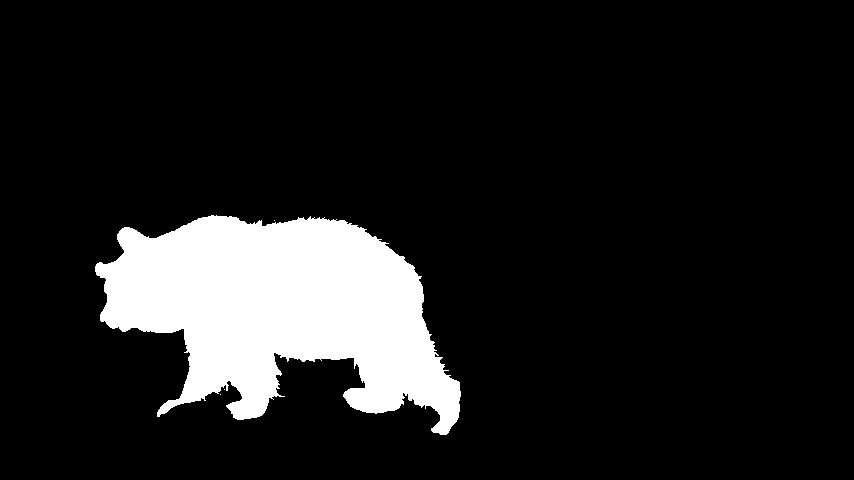

In [12]:
abear

In [13]:
np.asarray(bear).shape

(480, 854, 3)

In [14]:
temp = np.zeros((5, 480*854))

In [15]:
count = 0
beararr = np.asarray(bear)
for i in range(480):
    for j in range(854):
        temp[:,count] = np.array([i,j,beararr[i,j][0], beararr[i,j][1], beararr[i,j][2]])
        count +=1
        

In [16]:
def xyrgb(img_arr):
    count = 0
    temp = np.zeros((5,img_arr.shape[0]*img_arr.shape[1]))
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            temp[:,count] = np.array([i,j,img_arr[i,j][0], img_arr[i,j][1], img_arr[i,j][2]])
            count +=1
            
    return temp

In [17]:
def normalise(xyrgb):
    inlessmeans = xyrgb- np.mean(xyrgb, axis=0)
    stds = np.std(xyrgb, axis=0)
    out = inlessmeans / stds
    return out

In [22]:
newbeararr = down_sample(beararr,4)
newbear = xyrgb(newbeararr)

KeyboardInterrupt: 

In [24]:
thing = beararr
thing.shape

(480, 854, 3)

In [25]:
thing2 = xyrgb(thing)

In [103]:
n = normalise(newbear)
print(n)

[[-1.21253077 -1.2356314  -1.25177762 ...  0.53224716  0.15977955
   0.31580715]
 [-1.21253077 -1.20328503 -1.18658087 ...  1.73241234  1.88762822
   1.83039243]
 [ 1.04718566  0.96392188  0.96491191 ... -0.7722802  -0.67627625
  -0.68317464]
 [ 0.77161049  0.80219002  0.80192004 ... -0.69400856 -0.60196018
  -0.65094942]
 [ 0.60626538  0.67280453  0.67152654 ... -0.79837075 -0.76917134
  -0.81207552]]


In [21]:
def down_sample(img,n):
    img_d=decimate(img, n, n=2, ftype='iir',axis=0, zero_phase=True)
    img_d=decimate(img_d, n, n=2, ftype='iir',axis=1, zero_phase=True)
    return img_d.astype("uint8") 

In [26]:
clusters = 10
normbear = normalise(newbear)
thing3 = normalise(thing2)

In [27]:
km = KMeans(clusters)

In [28]:
km.fit(thing2.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
labels = km.labels_.reshape((thing.shape[0], thing.shape[1]))

In [30]:
def colourlist(n):
    out = []
    r = np.random.randint(0,255)
    g = np.random.randint(0,255)
    b = np.random.randint(0,255)
    div = 256 / n
    for i in range(1,n+1):
        colour = np.array([(r+i*div)%256,(g+i*div)%256,(b+i*div)%256 ])
        out.append(colour)
        
    return out
        
    

In [35]:
out = np.zeros(thing.shape)
colours = colourlist(clusters)

for i in range(thing.shape[0]):
    for j in range(thing.shape[1]):
        colour = colours[labels[i,j]]
        out[i,j] = colour
        

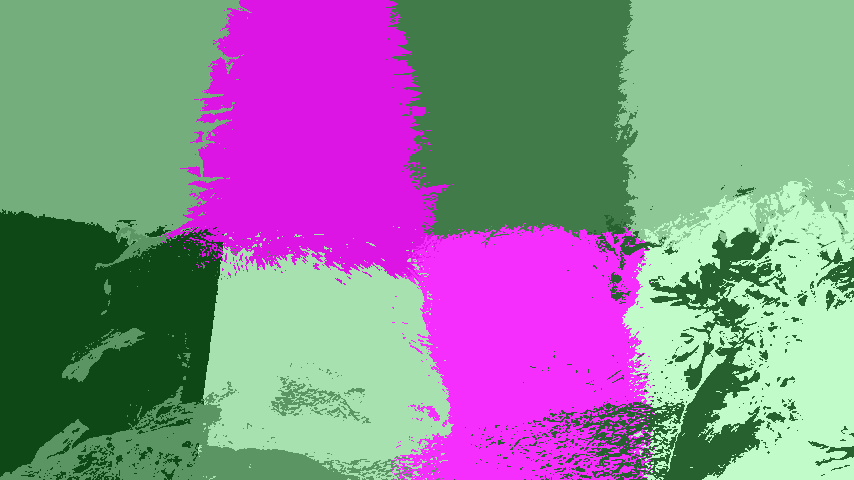

In [36]:
Image.fromarray(out.astype("uint8"))

In [303]:
js = []
for j in range(clusters):
    a = np.where(labels==j,1,0)
    js.append(jaccard_index(a,ab2))

In [304]:
js

[0.001850754338355324,
 0.0,
 0.13581989746637937,
 0.0,
 0.4361095672886066,
 0.0,
 0.018544861201179843,
 0.0,
 0.018269896193771628,
 0.07967474582994093]

In [20]:
def jaccard_index(img1, img2):
    """ Calculates the Jaccard index (IoU) measure for 2 detection bounding
        boxes in a frame.
        box1, box2: 2-tuples of the form (x, y), representing coordinates of
            the top left corner of the box.
        imshape: A 2-tuple (H, W), the shape of the image in which the boxes
            are detected.
    """

    plus = img1 + img2
    i = np.where(plus==2,1, 0)
    #print(i)
    j = np.where(plus != 0, 1, 0)
    #print(j)
    intersection = i.sum()
    
    union = j.sum()
    
    return intersection / union


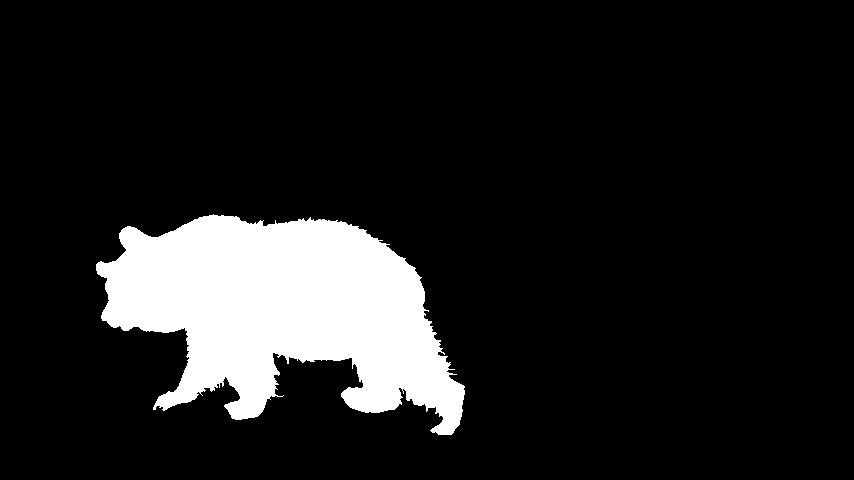

In [286]:
Image.fromarray(abeararr)

In [274]:
abeararr = np.asarray(abear)
ab2 = np.where(abeararr!= 0, 1, 0)

In [144]:
ab = down_sample(abeararr,4)

0

In [146]:
jaccard_index(ab, labels)

0.0011143156790770843

In [155]:
max(js)

0.006341463414634147